---
Stellen Sie bitte sicher, dass alles wie vorhergesehen läuft, bevor Sie dieses Übungsblatt abgeben. **Starten Sie den Kernel neu** (in der Menüleiste die Option Kernel$\rightarrow$Restart auswählen) und **validieren** Sie anschließend das Übungsblatt (in der Menüleiste auf Validate klicken) um Rückmeldung zu eventuellen fehlenden oder fehlerhaften Eingaben zu erhalten. 

Füllen Sie alle Stellen im Übungsblatt aus, welche entweder `DEIN CODE HIER` oder "DEINE ANTWORT HIER" enthalten. Geben Sie unterhalb Ihren vollständigen Namen an.

Wenn Sie Code-Bestandteile aus anderen Quellen (wie z.B. Stackoverflow) kopieren, dann machen sie den kopierten Code in ihrer Quellcodedatei kenntlich und fügen eine Referenz auf die Quelle als Kommentar hinzu.

Wenn Sie die Aufgaben in einer Gruppe erledigen, dann fügen Sie die Namen aller Gruppenmitglieder in der nachfolgende Zelle zu `Name` und zusätzlich als Kommentar am Anfang Ihrer Quellcodedatei hinzu.

---

In [ ]:
NAME = "Klaus Dannemüller"

---

<table style="width: 100%">
    <tr style="background: #ffffff">
        <td style="padding-top:25px;width: 180px">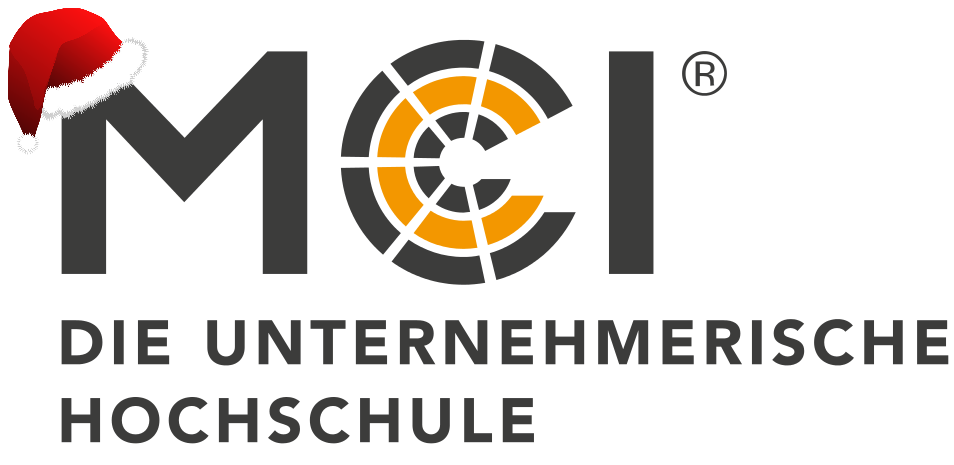</td>
        <td style="width: 100%">
            <div style="text-align:right; width: 100%; text-align:right"><font style="font-size:38px"><b>Methoden der Softwareentwicklung I</b></font></div>
            <div style="padding-top:0px; width: 100%; text-align:right"><font size="4"><b>WS 2021/22</b></font></div>
        </td>
    </tr>
</table>

---
# Übungsblatt 3

In [ ]:
import jagl
import os
import shutil

---
Abgabe bis <b>Sonntag, 02. Jänner 2022, 23:55 Uhr</b>

---
### Achtung:

*Bitte speichern Sie Ihre Quellcode-Dateien (&ast;.c) im selben Ordner wie dieses Übungsblatt. Beachten Sie außerdem die Kommentare zur richtigen Benennung Ihrer Dateien. Nur so ist eine korrekte Abgabe und Auswertung Ihrer Lösungen möglich.*

---
*Bitte verwenden Sie für Ihre Lösungen einen ordentlichen Programmierstil. Vor allem auf eine korrekte Formatierung, aussagekräftige Variablennamen und ausführliche Kommentare sollte dabei Wert gelegt werden.*

In [ ]:
# new test suite
jagl.testsuite_begin("Exercise 1")

# delete all build artifacts
jagl.remove_paths(files=["upper", "*.o"])

---
## 3.1 Großbuchstaben (17%)

Implementieren Sie ein Programm, dass mittels `scanf` eine Zeichenfolge einliest, jeden Kleinbuchstaben darin durch den entsprechenden Großbuchstaben ersetzt und die veränderte Zeichenfolge ausgibt. Nur Kleinbuchstaben sollen verändert werden, andere Zeichen sollen beibehalten werden. Ihre Implementierung soll für alle Zeichenfolgen mit Länge kleiner als 50 funktionieren. Achten Sie in Ihrer Implementierung darauf, dass es auch bei längeren Zeichenfolgen zu keinem Buffer-Overflow kommt.

**Achtung:** Die Benutzung von Bibliotheksfunktionen zur Umwandlung Ihrer Zeichenkette ist nicht erlaubt. Außerdem ist die Eingabe von Daten via `scanf` in Jupyter-Notebook nicht möglich. Testen Sie Ihre Implementierung daher direkt in der Kommandozeile.

In [ ]:
%%bash

# Schreiben Sie in diese Zelle den Befehl der dafür nötig ist um Ihr Programm zu kompilieren.
# Beachten Sie dabei, dass der Name ihrer Quellcode-Datei "upper.c" sein sollte.
# Beachten Sie dabei, dass der Name Ihres ausführbaren Programms "upper" sein sollte.

# DEINE ANTWORT HIER

In [ ]:
# Weisen Sie der untenstehenden Variable den Wert True zu, sobald Sie die Aufgabe erfolgreich erledigt haben!

# Datentyp: bool
exercise_3_1_solved = False

In [ ]:
executable_name = "upper"
source_files = ["upper.c"]
cpp_flags = []

In [ ]:
@jagl.testcase("1", desc="Exercise Solved")
def testcase_1_1(result, suite, case):
    varname = "exercise_3_1_solved"
    result.setSucceeded()
    jagl.check_variable_exists_and_has_type(result, globals(), varname, bool)
    if result.isSucceeded():
        if eval(varname):
            result.setSucceeded("Exercise solved.")
        else:
            result.setFailed("Exercise not solved.")

In [ ]:
@jagl.testcase("2", desc="Compiling program", deps=["1"])
def testcase_1_2(result, suite, case):
    if os.path.isfile(executable_name):
        result.setSucceeded("The program could be compiled successfully.")
        
    else:
        res = jagl.exec_bin("gcc", ["-o", executable_name] + source_files + cpp_flags)
        if res.state == jagl.ExecutionResult.SUCCESS:
            stdout = jagl.bytes_decode(res.stdout).strip()
            stderr = jagl.bytes_decode(res.stderr).strip()
            if res.exitCode == 0:
                if os.path.isfile(executable_name):
                    result.setSucceeded("The program could be compiled successfully.")
                else:
                    result.setFailed("gcc was executed successfully, but I couldn't find an executable.")
                if len(stderr) > 0:
                    result.setSucceeded(["However, there were warnings."] + stderr.split("\n"))
            else:
                result.setFailed(["The program could not be compiled:"] + stderr.split("\n"))
        elif res.state == jagl.ExecutionResult.NOTFOUND:
            result.setFailed("gcc could not be found. Please inform your course instructor.")
        elif res.state == jagl.ExecutionResult.TIMEOUT:
            result.setFailed("Timeout while calling gcc. Please inform your course instructor.")
        elif res.state == jagl.ExecutionResult.ERROR:
            result.setFailed(f'Unknown error during execution of gcc: {str(res.error)}. Please inform your course instructor.')

In [ ]:
@jagl.testcase("3", desc="Executing program", deps=["2"])
def testcase_1_3(result, suite, case):
    execresult = jagl.exec_bin("./" + executable_name, [], "Hallo Welt!\n", timeout = 30)
    jagl.check_execution_result(result, execresult, checkExitCode = False)
    if execresult.exitCode is not None:
        if execresult.exitCode == -11:
            result.setFailed("Program caused a segmentation fault.")
        elif execresult.exitCode < 0:
            result.setFailed(f"Program was abnormally terminated (Signal: {-execresult.exitCode})")
        elif execresult.exitCode > 0:
            result.setFailed(f"Program returned an exit code other than 0 (Exit Code: {execresult.exitCode})")

In [ ]:
@jagl.testcase("5", desc="Check output", deps=["3"])
def testcase_1_4(result, suite, case):
    truth="HALLO WELT!"
    execresult = suite.getLastExecutionResult()
    out = jagl.bytes_decode(execresult.stdout).strip()
    if out.endswith(truth):
        result.setSucceeded("Program produced the correct output.")
    else:
        result.setFailed("Program did not produce the correct output.")
        result.setFailed(f"Expected: '{truth}'")
        result.setFailed(f"Output: '{out}'")

In [ ]:
# new test suite
jagl.testsuite_begin("Exercise 2")

# delete all build artifacts
jagl.remove_paths(files=["average", "*.o"])

---
## 3.2 Mittelwert und Varianz (17%)

Implementieren Sie ein Programm, welches Mittelwert und die Varianz der Elemente eines Integer-Arrays ausgibt. Der Benutzer soll zuerst mittels `scanf` eingeben wie viele Elemente das Array enthalten soll. Anschließend soll ebenfalls mit `scanf` jedes einzelne Array-Element eingelesen werden. Sobald alle Elemente eingelesen wurden, soll das Array an eine Funktion übergeben werden, welche den Mittelwert und die Varianz aller Elemente berechnet. Der Mittelwert und die Varianz sollen dabei von dieser Funktion mittels Call-by-Reference in Form von sog. `Out-Arguments` zurückgegeben werden. Im Hauptprogramm soll dann der Mittelwert und die Varianz ausgegeben werden (mit jeweils genau einer Nachkommastelle).

Ein `Out-Argument` ist ein Funktionsargument, dass anders als "normale" Funktionsargumente (die auch `In-Argumente` genannt werden) dazu dient, einen Wert von einer Funktion zurück zu bekommen. Ein einzelner Wert wird normalerweise in Form eines Rückgabewerts zurückgegeben. Aber bei mehreren Werten (in unseren Fall zwei: Den Mittelwert und die Varianz) geht das über den Rückgabewert nicht so einfach. Eine Möglichkeit ist die Verwendung von Out-Argumenten. Out-Argumente werden einer Funktion mittels Call-by-Reference übergeben und die Werte, die zurückgegeben werden sollen, werden diesen Argumenten zugewiesen. Hier ein Beispiel für eine Funktion mit einem Out-Argument:

```
// The function argument arg is an out-argument that is passed as a pointer (call-by-reference)
void foo(int* arg) {
   *arg = 42; // Store 42 into arg
}

int var1 = 0;

// We pass var1 to function foo()
// Since we use call-by-reference we actually need to pass a pointer to var1
foo(&var1);

printf("var1 = %d\n", var1); // Output is "var1 = 42"
```

Die Varianz $\sigma^2$ berechnet sich über die Formel $\sigma^2=\frac{\sum_{i=0}^{n}{(x_i-\tilde{x})^2}}{n}$. Dabei ist $n$ die Anzahl der Elemente, $\tilde{x}$ der Mittelwert und $x_i$ das Array-Element mit dem Index $i$.  

Hier eine Beispielausgabe:

`> Geben Sie die Anzahl der Elemente Ihres Arrays an:`<br/>
3<br/>
`> Element #1:`<br/>
4<br/>
`> Element #2:`<br/>
2<br/>
`> Element #3:`<br/>
0<br/>
`> Der Mittelwert Ihres Arrays ist: 2.0`
`> Der Varianz Ihres Arrays ist: 4.0`


Wichtig für die Auswertung ist, dass zuerst die Arraygröße n eingelesen wird und dann genau n Elemente des Arrays. Halten Sie sich bitte exakt an diese Vorgehensweise!

In [ ]:
%%bash

# Schreiben Sie in diese Zelle den Befehl der dafür nötig ist um Ihr Programm zu kompilieren.
# Beachten Sie dabei, dass der Name ihrer Quellcode-Datei "average.c" sein sollte.
# Beachten Sie dabei, dass der Name Ihres ausführbaren Programms "average" sein sollte.

# DEINE ANTWORT HIER

In [ ]:
# Weisen Sie der untenstehenden Variable den Wert True zu, sobald Sie die Aufgabe erfolgreich erledigt haben!

# Datentyp: bool
exercise_3_2_solved = False

In [ ]:
executable_name = "average"
source_files = ["average.c"]
cpp_flags = []

In [ ]:
@jagl.testcase("1", desc="Exercise Solved")
def testcase_2_1(result, suite, case):
    varname = "exercise_3_2_solved"
    result.setSucceeded()
    jagl.check_variable_exists_and_has_type(result, globals(), varname, bool)
    if result.isSucceeded():
        if eval(varname):
            result.setSucceeded("Exercise solved.")
        else:
            result.setFailed("Exercise not solved.")

In [ ]:
@jagl.testcase("2", desc="Compiling program", deps=["1"])
def testcase_2_2(result, suite, case):
    if os.path.isfile(executable_name):
        result.setSucceeded("The program could be compiled successfully.")
        
    else:
        res = jagl.exec_bin("gcc", ["-o", executable_name] + source_files + cpp_flags)
        if res.state == jagl.ExecutionResult.SUCCESS:
            stdout = jagl.bytes_decode(res.stdout).strip()
            stderr = jagl.bytes_decode(res.stderr).strip()
            if res.exitCode == 0:
                if os.path.isfile(executable_name):
                    result.setSucceeded("The program could be compiled successfully.")
                else:
                    result.setFailed("gcc was executed successfully, but I couldn't find an executable.")
                if len(stderr) > 0:
                    result.setSucceeded(["However, there were warnings."] + stderr.split("\n"))
            else:
                result.setFailed(["The program could not be compiled:"] + stderr.split("\n"))
        elif res.state == jagl.ExecutionResult.NOTFOUND:
            result.setFailed("gcc could not be found. Please inform your course instructor.")
        elif res.state == jagl.ExecutionResult.TIMEOUT:
            result.setFailed("Timeout while calling gcc. Please inform your course instructor.")
        elif res.state == jagl.ExecutionResult.ERROR:
            result.setFailed(f'Unknown error during execution of gcc: {str(res.error)}. Please inform your course instructor.')

In [ ]:
@jagl.testcase("3", desc="Executing program", deps=["2"])
def testcase_1_3(result, suite, case):
    execresult = jagl.exec_bin("./" + executable_name, [], "3\n4\n2\n0\n", timeout = 30)
    jagl.check_execution_result(result, execresult, checkExitCode = False)
    out = jagl.bytes_decode(execresult.stdout).strip()
    result.setSucceeded(f"Output:  {out}")
    if execresult.exitCode is not None:
        if execresult.exitCode == -11:
            result.setFailed("Program caused a segmentation fault.")
        elif execresult.exitCode < 0:
            result.setFailed(f"Program was abnormally terminated (Signal: {-execresult.exitCode})")
        elif execresult.exitCode > 0:
            result.setFailed(f"Program returned an exit code other than 0 (Exit Code: {execresult.exitCode})")

In [ ]:
# new test suite
jagl.testsuite_begin("Exercise 3")

# delete all build artifacts
jagl.remove_paths(files=["*.o"])


---
## 3.3 String-Funktionen (32%)

Im Ordner dieses Übungsblattes finden Sie die Datei `my_string.h` welche einige Funktionsdeklarationen enthält. Ihre Aufgabe ist es nun diese Funktionen anhand der folgenden Beschreibungen zu implementieren. Diese Implementierung soll in der Datei `my_string.c` erfolgen. Die Funktionen sollen anschließend durch Einbindung der Header-Datei `my_string.h` in jedem beliebigen C-Programm verwendbar sein (selbe Vorgehensweise wie bei Übungsaufgabe 2.2). Sie können (und sollten) dies selbstverständlich testen, für die Abgabe ist jedoch nur die Datei `my_string.c` relevant. Damit Sie den Code von `my_string.c` in einem anderen Programm einbinden können, darf darin **keine main()-Funktion** enthalten sein. Achten Sie darauf, dass Ihre Abgabe kompilierbar und ausführbar ist, nur so können dafür Punkte vergeben werden. Änderungen an der Datei `my_string.h` sind nicht gestattet. Die Datei `string_test.c`, die Sie auch im Ordner des Übungszettel finden, wird von den Validier-Funktion benötigt, um Ihre Abgabe zu testen.<br/>

Folgende Funktionen sollen implementiert werden:<br/>
```c
int string_cmp(const char* str1, const char* str2)
```
Diese Funktion soll die Zeichenketten *str1* und *str2* vergleichen. Sind die beiden Zeichenketten gleich, dann soll 1 zurückgegeben werden, ansonsten 0.<br/><br/>
```c
unsigned int string_len(const char* str)
```
Diese Funktion soll die Länge (=Anzahl von Zeichen) einer Zeichenkette *str* als Integer zurückgeben. Das Nullterminierungszeichen soll dabei nicht mitgezählt werden.<br/><br/>
```c
void string_rev(unsigned char* str)
```
Diese Funktion soll eine Zeichenkette *str* umkehren. Beachten Sie, dass hier *Call-by-Reference* verwendet wird und der umgedrehte String über das Funktionsargument `str` zurück gegeben werden soll (in so einem Fall redet man auch von einem, `In-Out Argument`).<br/><br/>
```c
char *string_chr(const char* str, const char c)
```
Diese Funktion soll eine Zeichenkette *str* nach einem Zeichen <i>c</i> durchsuchen. Wird das gesuchte Zeichen gefunden, so soll ein Pointer darauf zurückgegeben werden. Nur das erste Auftreten von <i>c</i> in *str* soll dabei beachtet werden. Enthält *str* das Zeichen <i>c</i> nicht, dann soll `NULL` zurückgegeben werden.

In [ ]:
# Weisen Sie der untenstehenden Variable den Wert True zu, sobald Sie die Aufgabe erfolgreich erledigt haben!

# Datentyp: bool
exercise_3_3_solved = False

In [ ]:
executable_name = "string_test"
source_files = ["string_test.c", "my_string.c"]
cpp_flags = []

In [ ]:
@jagl.testcase("1", desc="Exercise Solved")
def testcase_3_1(result, suite, case):
    varname = "exercise_3_3_solved"
    result.setSucceeded()
    jagl.check_variable_exists_and_has_type(result, globals(), varname, bool)
    if result.isSucceeded():
        if eval(varname):
            result.setSucceeded("Exercise solved.")
        else:
            result.setFailed("Exercise not solved.")

In [ ]:
@jagl.testcase("2", desc="Compiling program", deps=["1"])
def testcase_3_2(result, suite, case):
    if os.path.isfile(executable_name):
        result.setSucceeded("The program could be compiled successfully.")
        
    else:
        res = jagl.exec_bin("gcc", ["-o", executable_name] + source_files + cpp_flags)
        if res.state == jagl.ExecutionResult.SUCCESS:
            stdout = jagl.bytes_decode(res.stdout).strip()
            stderr = jagl.bytes_decode(res.stderr).strip()
            if res.exitCode == 0:
                if os.path.isfile(executable_name):
                    result.setSucceeded("The program could be compiled successfully.")
                else:
                    result.setFailed("gcc was executed successfully, but I couldn't find an executable.")
                if len(stderr) > 0:
                    result.setSucceeded(["However, there were warnings."] + stderr.split("\n"))
            else:
                result.setFailed(["The program could not be compiled:"] + stderr.split("\n"))
        elif res.state == jagl.ExecutionResult.NOTFOUND:
            result.setFailed("gcc could not be found. Please inform your course instructor.")
        elif res.state == jagl.ExecutionResult.TIMEOUT:
            result.setFailed("Timeout while calling gcc. Please inform your course instructor.")
        elif res.state == jagl.ExecutionResult.ERROR:
            result.setFailed(f'Unknown error during execution of gcc: {str(res.error)}. Please inform your course instructor.')

In [ ]:
@jagl.testcase("4", desc="Executing program", deps=["2"])
def testcase_3_4(result, suite, case):
    execresult = jagl.exec_bin("./" + executable_name, [], None, timeout = 30)
    jagl.check_execution_result(result, execresult, checkExitCode = False)
    if execresult.exitCode is not None:
        if execresult.exitCode == -11:
            result.setFailed("Program caused a segmentation fault.")
        elif execresult.exitCode < 0:
            result.setFailed("Program was abnormally terminated (Signal: {})".format(-execresult.exitCode))

In [ ]:
# new test suite
jagl.testsuite_begin("Exercise 4")

# delete all build artifacts
jagl.remove_paths(files=["frequency", "*.o"])

---
## 3.4  Häufigkeitsberechnung mit Pointerarithmetik (17%)

Implementieren Sie ein Programm, welches eine Zeichenfolge als Kommandozeilenparameter einliest und anschließend für diese Zeichenfolge die Häufigkeit der einzelnen Zeichen in sortierter Form ausgibt (in Reihenfolge ihres Vorkommens in der ASCII-Tabelle). **Wichtig:** Verwenden Sie dafür Pointerarithmetik! Hier eine beispielhafte Ausgabe für den Kommandozeilenparameter `Hello World!`:<br/><br/>
`> Zeichen: ' ' - Häufigkeit: 1`<br/>
`> Zeichen: '!' - Häufigkeit: 1`<br/>
`> Zeichen: 'H' - Häufigkeit: 1`<br/>
`> Zeichen: 'W' - Häufigkeit: 1`<br/>
`> Zeichen: 'd' - Häufigkeit: 1`<br/>
`> Zeichen: 'e' - Häufigkeit: 1`<br/>
`> Zeichen: 'l' - Häufigkeit: 3`<br/>
`> Zeichen: 'o' - Häufigkeit: 2`<br/>
`> Zeichen: 'r' - Häufigkeit: 1`<br/>

Verwenden Sie bei Ihrer Ausgabe obiges Format, d.h. Zeilenumbruch nach jedem Eintrag. Nur Zeichen welche in der Zeichenkette mindestens einmal vorkommen, sollen berücksichtigt werden.

Überprüfen Sie außerdem, ob der Benutzer genügend Kommandozeilenparameter angegeben hat, und wenn nicht, geben Sie eine entsprechende Fehlermeldung aus und beenden das Programm mit einem Exit-Code ungleich 0.

In [ ]:
%%bash

# Schreiben Sie in diese Zelle den Befehl der dafür nötig ist um Ihr Programm zu kompilieren.
# Beachten Sie dabei, dass der Name ihrer Quellcode-Datei "frequency.c" sein sollte.
# Beachten Sie dabei, dass der Name Ihres ausführbaren Programms "frequency" sein sollte.

# DEINE ANTWORT HIER

In [ ]:
# Weisen Sie der untenstehenden Variable den Wert True zu, sobald Sie die Aufgabe erfolgreich erledigt haben!

# Datentyp: bool
exercise_3_4_solved = False

In [ ]:
executable_name = "string_test"
source_files = ["string_test.c", "my_string.c"]
cpp_flags = []

In [ ]:
@jagl.testcase("1", desc="Exercise Solved")
def testcase_4_1(result, suite, case):
    varname = "exercise_3_4_solved"
    result.setSucceeded()
    jagl.check_variable_exists_and_has_type(result, globals(), varname, bool)
    if result.isSucceeded():
        if eval(varname):
            result.setSucceeded("Exercise solved.")
        else:
            result.setFailed("Exercise not solved.")

In [ ]:
@jagl.testcase("2", desc="Compiling program", deps=["1"])
def testcase_4_2(result, suite, case):
    if os.path.isfile(executable_name):
        result.setSucceeded("The program could be compiled successfully.")
        
    else:
        res = jagl.exec_bin("gcc", ["-o", executable_name] + source_files + cpp_flags)
        if res.state == jagl.ExecutionResult.SUCCESS:
            stdout = jagl.bytes_decode(res.stdout).strip()
            stderr = jagl.bytes_decode(res.stderr).strip()
            if res.exitCode == 0:
                if os.path.isfile(executable_name):
                    result.setSucceeded("The program could be compiled successfully.")
                else:
                    result.setFailed("gcc was executed successfully, but I couldn't find an executable.")
                if len(stderr) > 0:
                    result.setSucceeded(["However, there were warnings."] + stderr.split("\n"))
            else:
                result.setFailed(["The program could not be compiled:"] + stderr.split("\n"))
        elif res.state == jagl.ExecutionResult.NOTFOUND:
            result.setFailed("gcc could not be found. Please inform your course instructor.")
        elif res.state == jagl.ExecutionResult.TIMEOUT:
            result.setFailed("Timeout while calling gcc. Please inform your course instructor.")
        elif res.state == jagl.ExecutionResult.ERROR:
            result.setFailed(f'Unknown error during execution of gcc: {str(res.error)}. Please inform your course instructor.')

In [ ]:
@jagl.testcase("3", desc="Executing program", deps=["2"])
def testcase_4_3(result, suite, case):
    execresult = jagl.exec_bin("./" + executable_name, ["Hallo Welt!"], None, timeout = 30)
    jagl.check_execution_result(result, execresult, checkExitCode = False)
    if execresult.exitCode is not None:
        if execresult.exitCode == -11:
            result.setFailed("Program caused a segmentation fault.")
        elif execresult.exitCode < 0:
            result.setFailed("Program was abnormally terminated (Signal: {})".format(-execresult.exitCode))
        elif execresult.exitCode > 0:
            result.setFailed(f"Program returned an exit code other than 0 (Exit Code: {execresult.exitCode})")

In [ ]:
@jagl.testcase("4", desc="Executing program without arguments", deps=["2"])
def testcase_4_4(result, suite, case):
    execresult = jagl.exec_bin("./" + executable_name, [], None, timeout = 30)
    jagl.check_execution_result(result, execresult, checkExitCode = False)
    if execresult.exitCode is not None:
        if execresult.exitCode == -11:
            result.setFailed("Program caused a segmentation fault.")
        elif execresult.exitCode < 0:
            result.setFailed(f"Program was abnormally terminated (Signal: {-execresult.exitCode})")

In [ ]:
# new test suite
jagl.testsuite_begin("Exercise 5")

# delete all build artifacts
jagl.remove_paths(files=["*.o"])


---
## 3.5  Sortieren von Geschenken (17%)

Man stelle sich einen Weihnachtswichtel vor, welcher vor n Geschenken steht, die unterschiedliche Größen haben dürfen. Die Geschenke sind in einer von links nach rechts verlaufenden Reihe aufgestellt. Ganz links steht der Weihnachtswichtel und möchte die Geschenke von links nach rechts der Größe nach aufsteigend sortieren. Dazu vergleicht er die beiden Geschenke, vor denen er gerade steht. Stellt er fest, dass sie in der richtigen Reihenfolge sind, so macht er einen Schritt nach rechts. Stellt er hingegen fest, dass die Reihenfolge nicht stimmt, so vertauscht er die beiden Geschenke und macht einen Schritt nach links. Falls er nicht weiter nach links gehen kann (wenn beispielsweise der erste Vergleich zum Ergebnis führte, dass sich das erste und zweite Geschenk in der falschen Reihenfolge befanden), macht er einen Schritt nach rechts. Dies wiederholt er ständig. Fertig ist er, wenn er am ganz rechts stehenden Geschenk ankommt. Da sich rechts daneben kein weiteres Geschenk mehr befindet, kann kein Vergleich mehr stattfinden.

<img style="width: 220px" src="https://lasbrujastequeremosayudar.files.wordpress.com/2015/11/imagen-animada-regalos-de-navidad-78.gif?w=500" alt="presents">

Implementieren Sie den Sortieralgorithmus, der hier beschrieben ist. Die n Geschenke sollen dabei n Integer sein. Im Ordner dieses Übungsblattes finden Sie die Datei `xmas_sort.h`, welche die Funktionsdeklaration für diesen Algorithmus enthält. Ihre Implementierung soll in der Datei `xmas_sort.c` erfolgen. Die Funktion sollen anschließend durch Einbindung der Header-Datei `xmas_sort.h` in jedem beliebigen C-Programm verwendbar sein (selbe Vorgehensweise wie bei Übungsaufgabe 3.3, auch hier sollte wieder **keine main()-Funktion** enthalten sein). Sie können (und sollten) dies selbstverständlich testen, für die Abgabe ist jedoch nur die Datei `xmas_sort.c` relevant. Achten Sie darauf, dass Ihre Abgabe kompilierbar und ausführbar ist, nur so können dafür Punkte vergeben werden. Änderungen an der Datei `xmas_sort.h` sind nicht gestattet. Die Datei `xmas_sort_test.c`, die Sie auch im Ordner des Übungszettel finden, wird von den Validier-Funktion benötigt, um Ihre Abgabe zu testen.

In [ ]:
# Weisen Sie der untenstehenden Variable den Wert True zu, sobald Sie die Aufgabe erfolgreich erledigt haben!

# Datentyp: bool
exercise_3_5_solved = False

In [ ]:
executable_name = "xmas_sort_test"
source_files = ["xmas_sort_test.c", "xmas_sort.c"]
cpp_flags = []

In [ ]:
@jagl.testcase("1", desc="Exercise Solved")
def testcase_5_1(result, suite, case):
    varname = "exercise_3_5_solved"
    result.setSucceeded()
    jagl.check_variable_exists_and_has_type(result, globals(), varname, bool)
    if result.isSucceeded():
        if eval(varname):
            result.setSucceeded("Exercise solved.")
        else:
            result.setFailed("Exercise not solved.")

In [ ]:
@jagl.testcase("2", desc="Compiling program", deps=["1"])
def testcase_5_2(result, suite, case):
    if os.path.isfile(executable_name):
        result.setSucceeded("The program could be compiled successfully.")
        
    else:
        res = jagl.exec_bin("gcc", ["-o", executable_name] + source_files + cpp_flags)
        if res.state == jagl.ExecutionResult.SUCCESS:
            stdout = jagl.bytes_decode(res.stdout).strip()
            stderr = jagl.bytes_decode(res.stderr).strip()
            if res.exitCode == 0:
                if os.path.isfile(executable_name):
                    result.setSucceeded("The program could be compiled successfully.")
                else:
                    result.setFailed("gcc was executed successfully, but I couldn't find an executable.")
                if len(stderr) > 0:
                    result.setSucceeded(["However, there were warnings."] + stderr.split("\n"))
            else:
                result.setFailed(["The program could not be compiled:"] + stderr.split("\n"))
        elif res.state == jagl.ExecutionResult.NOTFOUND:
            result.setFailed("gcc could not be found. Please inform your course instructor.")
        elif res.state == jagl.ExecutionResult.TIMEOUT:
            result.setFailed("Timeout while calling gcc. Please inform your course instructor.")
        elif res.state == jagl.ExecutionResult.ERROR:
            result.setFailed(f'Unknown error during execution of gcc: {str(res.error)}. Please inform your course instructor.')

In [ ]:
@jagl.testcase("3", desc="Executing program", deps=["2"])
def testcase_5_3(result, suite, case):
    execresult = jagl.exec_bin("./" + executable_name, [], None, timeout = 30)
    jagl.check_execution_result(result, execresult, checkExitCode = False)
    if execresult.exitCode is not None:
        if execresult.exitCode == -11:
            result.setFailed("Program caused a segmentation fault.")
        elif execresult.exitCode < 0:
            result.setFailed("Program was abnormally terminated (Signal: {})".format(-execresult.exitCode))